<a href="https://colab.research.google.com/github/aparecium84/5-29/blob/main/5_29_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls '/content/drive/MyDrive/Colab Notebooks/txt'

SherlockHolmesComplete-Ch.1.txt  SherlockHolmesComplete-Ch.3.txt
SherlockHolmesComplete-Ch.2.txt


In [3]:
import nltk
nltk.download("popular")
nltk.download('all-corpora')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

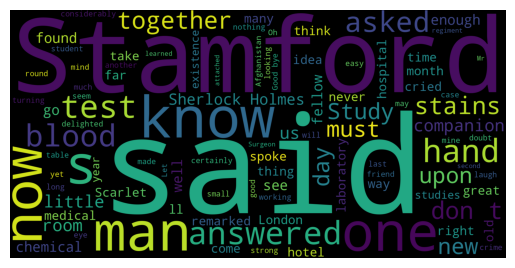

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# doc: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

#讀取文本
file_text = open('/content/drive/MyDrive/Colab Notebooks/txt/SherlockHolmesComplete-Ch.1.txt','r').read()


# background_color 背景顏色
# width 寬
# height 高
# margin 圖片邊緣
# max_font_size 設定文字中最大的大小是多少
# min_font_size
# max_words  文字雲顯示最大詞數
# font_path="/tmp/DFFT_C7.ttc", #設置字體

temp = WordCloud(
    background_color="black",
    width=2000,
    height=1000,
    margin= 10,
    max_words=100
).generate(file_text)


plt.imshow(temp)
plt.axis("off")
plt.show()

In [6]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{"i've", 'how', "don't", 'off', 'until', 'he', "wasn't", 'an', 'we', "won't", "why's", "i'd", 'any', "couldn't", 'under', 'she', 'which', 'on', "they've", 'being', "i'll", 'was', 'i', 'nor', 'k', 'get', 'herself', "we'd", 'your', "she's", 'myself', 'in', "doesn't", "you're", 'me', 'those', 'ourselves', "hadn't", 'most', 'himself', "who's", 'shall', 'doing', "she'll", 'ours', 'were', 'then', "they'd", 'whom', 'with', 'otherwise', 'as', 'has', 'hence', 'there', "when's", 'some', 'however', 'during', 'her', 'yourselves', 'when', 'hers', 'since', "shouldn't", 'they', 'r', "haven't", 'and', 'theirs', 'from', 'only', 'so', 'up', 'through', 'after', 'am', 'its', 'cannot', 'for', "we'll", "we're", "hasn't", 'like', 'not', "let's", 'where', 'at', 'if', 'had', "isn't", 'into', 'who', "you'll", "how's", 'it', 'do', 'does', 'further', 'above', 'between', 'both', 'him', 'ought', 'than', 'just', 'ever', 'because', "didn't", 'very', "it's", "they're", "weren't", 'else', "that's", "we've", "can't", 'a

In [22]:
import nltk

from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/MyDrive/Colab Notebooks/txt' # 請改成自己的路徑
wordlists = PlaintextCorpusReader(corpus_root, '.*') # *: all .txt

books = wordlists.fileids()
print(books)

['SherlockHolmesComplete-Ch.1.txt', 'SherlockHolmesComplete-Ch.2.txt', 'SherlockHolmesComplete-Ch.3.txt']


In [27]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

dataset = wordlists.raw('SherlockHolmesComplete-Ch.1.txt') # your txt file
text_list = dataset.split()

stop = stopwords.words('english')
wnl = WordNetLemmatizer()

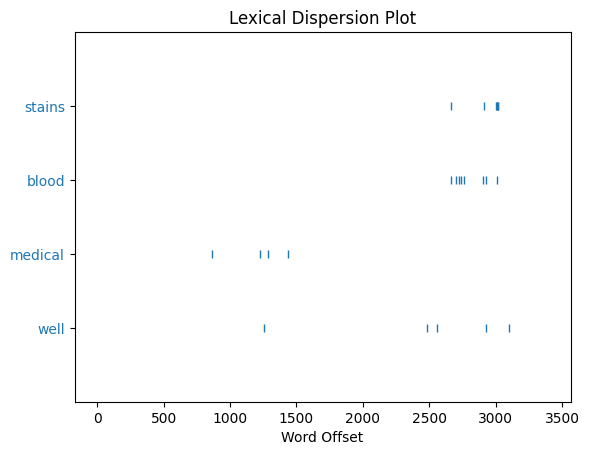

In [28]:
import nltk
testText = wordlists.words('SherlockHolmesComplete-Ch.1.txt')
single = nltk.text.Text(testText)

findList = ["stains","blood", "medical", "well"]
single.dispersion_plot(findList)

In [33]:
#分析高頻率單字

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

dataset = wordlists.raw('SherlockHolmesComplete-Ch.1.txt') # your txt file
text_list = dataset.split()

stop = stopwords.words('english')
wnl = WordNetLemmatizer()

# 去掉停用
clean_tokens = text_list[:]
for token in text_list:
  if token.lower() in stopwords.words('english'):
    clean_tokens.remove(token)


# 去掉標點
no_string_tokens = clean_tokens
for token in clean_tokens:
  if token in string.punctuation or token in '--' or token in '?' or token in '!': # ? !..
    no_string_tokens.remove(token)

# 轉成小寫, 去掉空格
lower_tokens = []
for token in no_string_tokens:
  new_token = token.replace(' ', '');
  lower_tokens.append(new_token.lower())

# 詞性還原
lemmatizer_tokens = []
for token in lower_tokens:
 lemmatizer_tokens.append(wnl.lemmatize(token))


fdist = FreqDist(lemmatizer_tokens)
#出現頻率最高的10個單字
fdist1 = fdist.most_common(10)
print(fdist1)

[('study', 9), ('“you', 9), ('one', 8), ('know', 8), ('would', 8), ('“i', 8), ('could', 7), ('get', 7), ('don’t', 7), ('said', 7)]


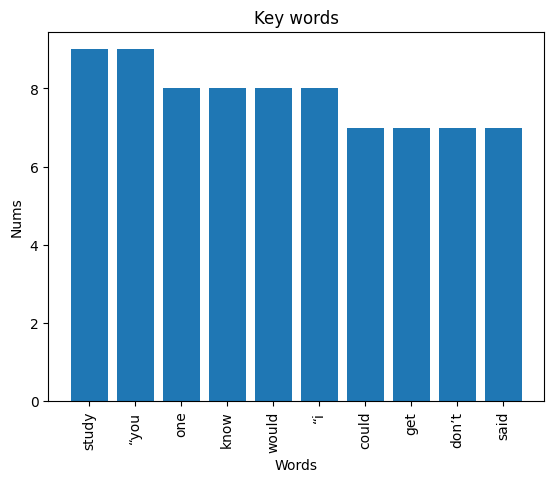

In [34]:
import matplotlib.pyplot as plt

x = [data[0] for data in fdist1] # ['people', 'older', 'life' ...]
y = [data[1] for data in fdist1] # ['29', '19', '12' ...]

plt.bar(x, y)     #繪製長條圖
plt.title('Key words')          #設定圖形標題
plt.xlabel('Words')                #設定X軸標籤
plt.ylabel('Nums')                   #設定Y軸標籤
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [ ]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:7]) # 表格下方顯示txt檔名前七個字
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)
           #List裡面請改成你要搜尋的字詞
           for target in ['happy', 'positive', 'negative', 'happier']
           if w.lower().startswith(target))
cfd.plot()